In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
path = '/content/Breast_cancer_data.csv'
df = pd.read_csv(path)
df.shape

(569, 6)

In [3]:
num_data_points = len(df)
print("Number of data points:", num_data_points)

Number of data points: 569


In [4]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [6]:
df["diagnosis"].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis'>

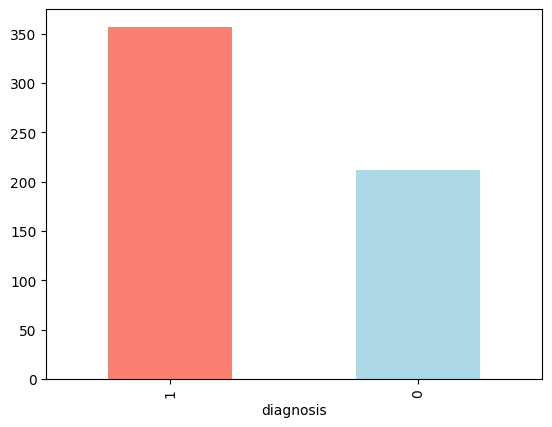

In [7]:
df["diagnosis"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [9]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [10]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [24]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


(6.5, -0.5)

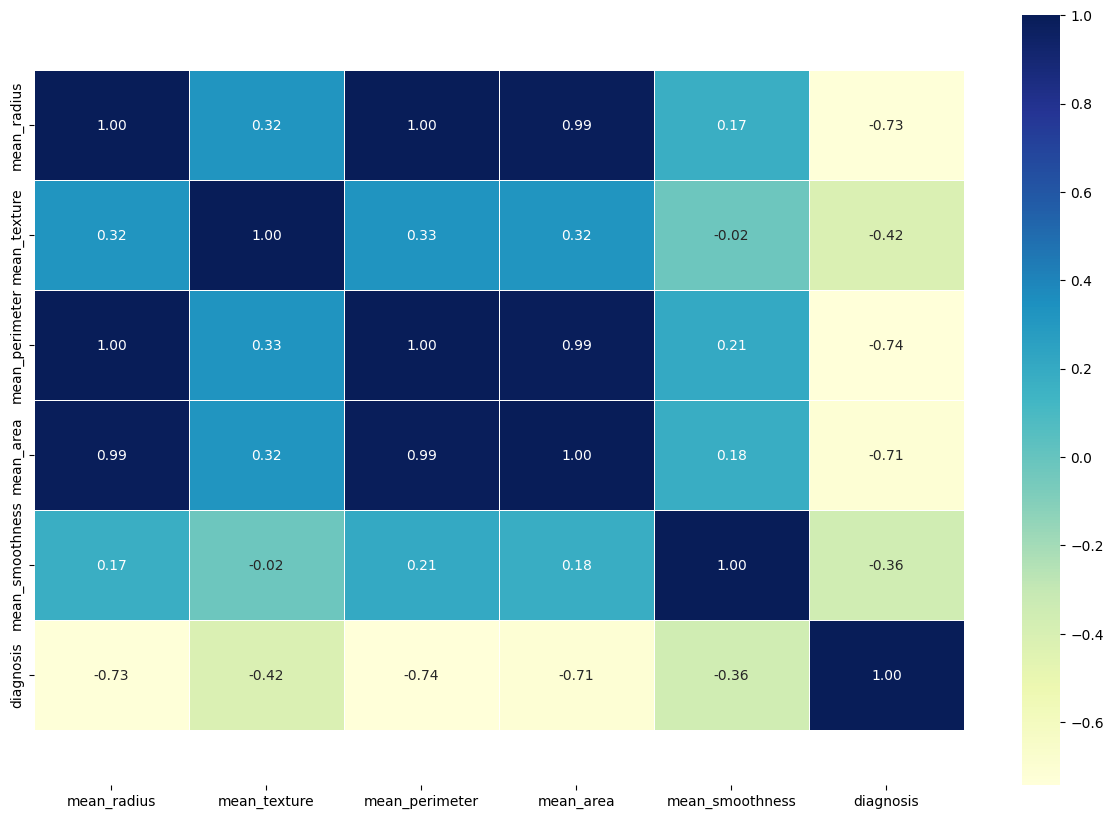

In [25]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# **Traning and Testing Phase**

In [26]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


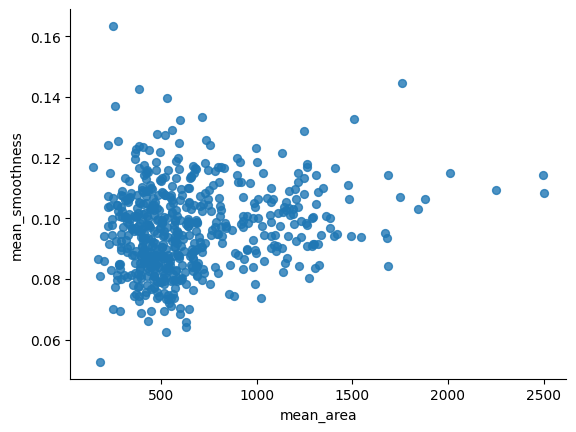

In [52]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='mean_area', y='mean_smoothness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

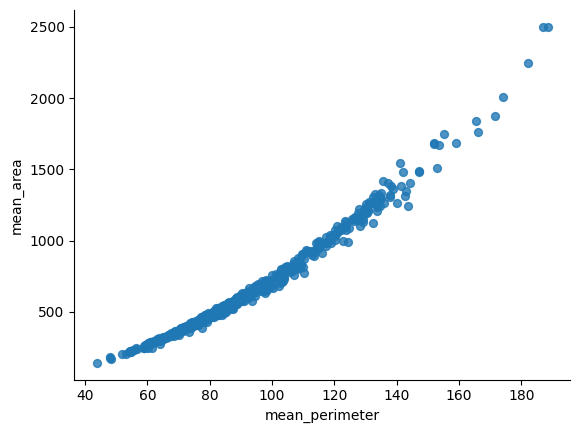

In [50]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='mean_perimeter', y='mean_area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

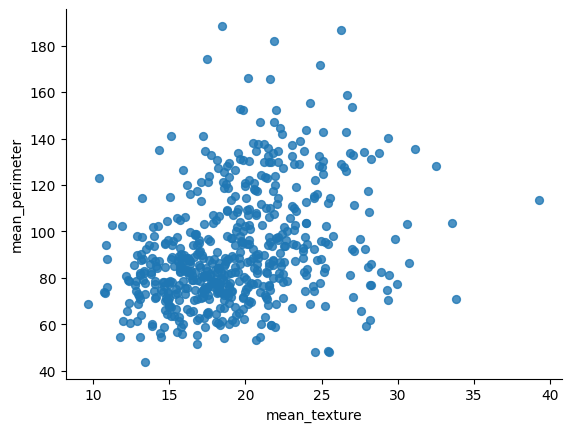

In [49]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='mean_texture', y='mean_perimeter', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

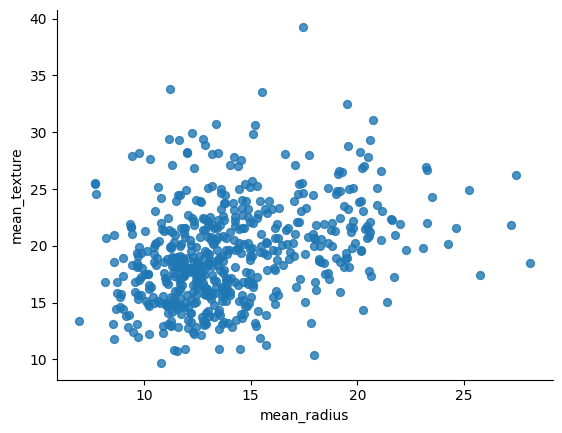

In [48]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='mean_radius', y='mean_texture', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [28]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [30]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [31]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
149,13.740,17.91,88.12,585.0,0.07944
124,13.370,16.39,86.10,553.5,0.07115
421,14.690,13.98,98.22,656.1,0.10310
195,12.910,16.33,82.53,516.4,0.07941
545,13.620,23.23,87.19,573.2,0.09246
...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783
106,11.640,18.33,75.17,412.5,0.11420
270,14.290,16.82,90.30,632.6,0.06429
435,13.980,19.62,91.12,599.5,0.10600


In [32]:
y_train, len(y_train)

(149    1
 124    1
 421    1
 195    1
 545    1
       ..
 71     1
 106    1
 270    1
 435    0
 102    1
 Name: diagnosis, Length: 398, dtype: int64,
 398)

# **KNN**

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Print accuracy and confusion matrix
print("Accuracy: {:.2f}%".format(accuracy1 * 100))
print("Confusion Matrix:\n", confusion_mat)

F1 accuracy:92.24%
Accuracy: 90.06%
Confusion Matrix:
 [[ 53  10]
 [  7 101]]


<Axes: >

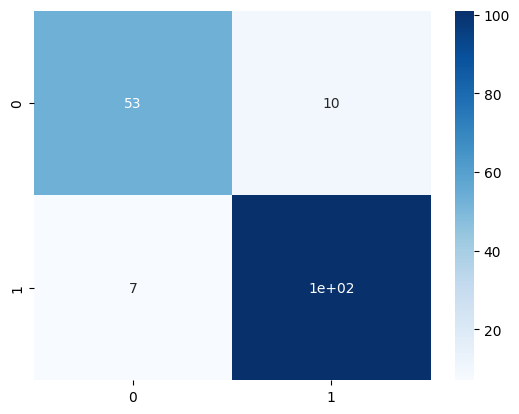

In [34]:
import seaborn as sns

sns.heatmap(confusion_mat, annot=True, cmap='Blues')

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        63
           1       0.91      0.94      0.92       108

    accuracy                           0.90       171
   macro avg       0.90      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



# **SVM**

In [41]:
clf = SVC(kernel='poly')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

y_true = y_test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_true, y_pred)


#Find F1 Accuracy
f1 = f1_score(y_test,y_pred)
print("F1 accuracy:{:.2f}%".format(f1 * 100))
# Calculate accuracy of the model
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy3 * 100))
print(cm)

F1 accuracy:91.91%
Accuracy: 88.89%
[[ 44  19]
 [  0 108]]


<Axes: >

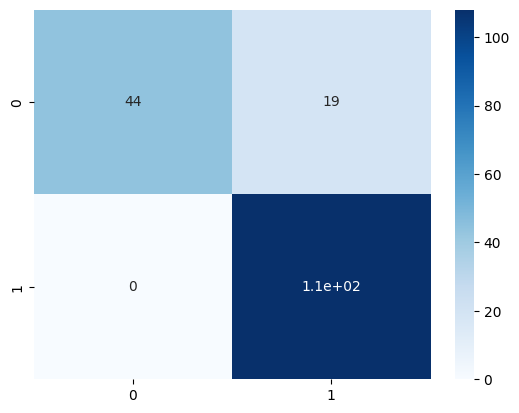

In [42]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues')

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        63
           1       0.85      1.00      0.92       108

    accuracy                           0.89       171
   macro avg       0.93      0.85      0.87       171
weighted avg       0.91      0.89      0.88       171



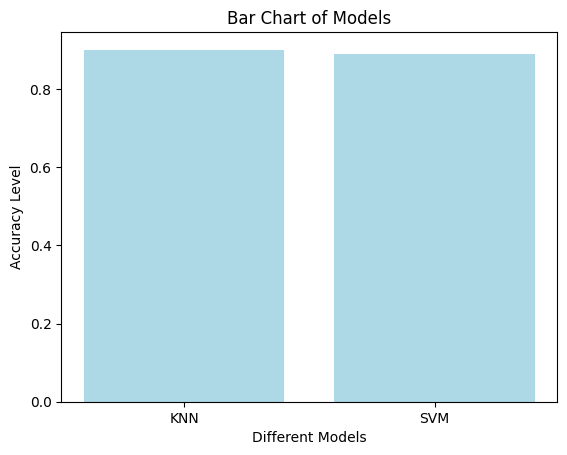

In [54]:
import matplotlib.pyplot as plt

x_axis = ['KNN', 'SVM']
y_axis = [accuracy1, accuracy2]

plt.bar(x_axis, y_axis,color= 'lightblue')
plt.title('Bar Chart of Models')
plt.xlabel('Different Models')
plt.ylabel('Accuracy Level')
plt.show()